Lab07 - Linear Regression(without min/max)
 * Linear Regression에 대한 설명(Data에 대한 표준화나 정규화 없이 수행)

# 기본 Library 선언 및 Tensorflow 버전 확인

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

tf.random.set_seed(777)

print(tf.__version__)

2.3.1


 * X Data(Feature)의 값은 해당 배열의 첫번째 값부터 4번째 값까지로 정의되고, Y Data(Label)는 해당 배열의 마지막 값을 정의(5번째 값)

In [3]:
xy = np.array([[828.659973, 833.450012, 908100, 828.349976, 831.659973],
               [823.02002, 828.070007, 1828100, 821.655029, 828.070007],
               [819.929993, 824.400024, 1438100, 818.97998, 824.159973],
               [816, 820.958984, 1008100, 815.48999, 819.23999],
               [819.359985, 823, 1188100, 818.469971, 818.97998],
               [819, 823, 1198100, 816, 820.450012],
               [811.700012, 815.25, 1098100, 809.780029, 813.669983],
               [809.51001, 816.659973, 1398100, 804.539978, 809.559998]])

x_train = xy[:, 0:-1]
y_train = xy[:, [-1]]

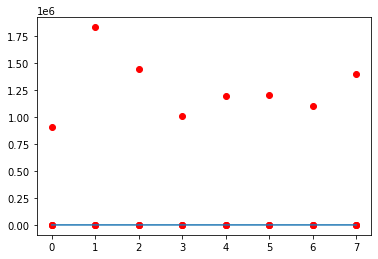

In [4]:
plt.plot(x_train,'ro')
plt.plot(y_train)

 * Tensorflow Data API를 통해 학습시킬 값들을 담는다. (Batch Size는 한번에 학습시킬 Size로 정한다)
 * X(features), Y(labels)는 실제 학습에 쓰일 Data(연산을 위해 Type를 맞춰준다)

In [5]:
dataset = tf.data.Dataset.from_tensor_slices((x_train,y_train)).batch(len(x_train))

 * W와 b는 학습을 통해 생성되는 모델에 쓰이는 Weight와 Bias(초기값을 Variable : 0이나 Random 값으로 가능 tf.random_normal([3,3],tf.zeros([3,3]))

In [6]:
W = tf.Variable(tf.random.normal((4,1)),dtype=tf.float32)
b = tf.Variable(tf.random.normal((1,)),dtype=tf.float32)

 * Linear Regression의 Hypothesis를 정의한다.

In [7]:
def linearReg_fn(features):
    hypothesis = tf.matmul(features,W) + b
    return hypothesis

 * 가설을 검증할 Cost 함수를 정의합니다.(Mean Square Error를 사용)

In [8]:
def loss_fn(hypothesis,features,labels):
    cost = tf.reduce_mean(tf.square(hypothesis - labels))
    return cost

 * GradientDescentOptimizer로 학습 실행

In [9]:
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-5)

def grad(hypothesis,features,labels):
    with tf.GradientTape() as tape:
        loss_value = loss_fn(linearReg_fn(features),features,labels)
    return tape.gradient(loss_value,[W,b]), loss_value

# Tensorflow를 통해 학습을 진행합니다.

In [11]:
EPOCHS = 101

for step in range(EPOCHS):
    for features, labels  in dataset:
        features = tf.cast(features, tf.float32)
        labels = tf.cast(labels, tf.float32)
        hypo_value = linearReg_fn(features)
        grads, loss_value = grad(linearReg_fn(features), features, labels)        
        optimizer.apply_gradients(grads_and_vars=zip(grads,[W,b]))    
    print("Iter: {}, Loss: {:.4f}, Prediction: {}".format(step, loss_value, hypo_value))

Iter: 0, Loss: 5136834560.0000, Prediction: [[ -49687.156]
 [-100995.7  ]
 [ -79251.805]
 [ -55277.945]
 [ -65311.965]
 [ -65869.88 ]
 [ -60302.1  ]
 [ -77032.25 ]]
Iter: 1, Loss: 5643738691255766863577088.0000, Prediction: [[1.6757714e+12]
 [3.3734997e+12]
 [2.6538103e+12]
 [1.8603069e+12]
 [2.1924711e+12]
 [2.2109249e+12]
 [2.0263890e+12]
 [2.5799961e+12]]
Iter: 2, Loss: inf, Prediction: [[-5.5545705e+19]
 [-1.1181921e+20]
 [-8.7964132e+19]
 [-6.1662389e+19]
 [-7.2672419e+19]
 [-7.3284086e+19]
 [-6.7167402e+19]
 [-8.5517455e+19]]
Iter: 3, Loss: inf, Prediction: [[1.8411374e+27]
 [3.7063983e+27]
 [2.9156897e+27]
 [2.0438832e+27]
 [2.4088256e+27]
 [2.4291002e+27]
 [2.2263544e+27]
 [2.8345916e+27]]
Iter: 4, Loss: inf, Prediction: [[-6.1026988e+34]
 [-1.2285358e+35]
 [-9.6644474e+34]
 [-6.7747269e+34]
 [-7.9843775e+34]
 [-8.0515803e+34]
 [-7.3795522e+34]
 [-9.3956361e+34]]
Iter: 5, Loss: inf, Prediction: [[inf]
 [inf]
 [inf]
 [inf]
 [inf]
 [inf]
 [inf]
 [inf]]
Iter: 6, Loss: nan, Predict